In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
nx = 41
L = 2.
dx = L / ( nx - 1 ) 
nu = .3
sigma = .2
dt = sigma * dx**2 / nu
nt = 20

In [3]:
x = numpy.linspace( 0., L, nx )

In [4]:
u0 = numpy.ones( nx )
mask = numpy.where( ( x >= 0.5 ) & ( x <= 1 ) )
u0[ mask ] = 2.

In [5]:
u = u0.copy()

for n in range( nt ):
    
    un = u.copy()
    
    for i in range( 1, nx - 1 ):
        
        u[ i ] = un[ i ] + sigma * ( un[ i - 1 ] - 2 * un[ i ] + un[ i + 1 ] )
    
#     u[ 0 ] = 1.
#     u[ -1 ] = 1.

u_naive = u

In [6]:
u = u0.copy()

for n in range( nt ):
    un = u.copy()
    u[ 1:-1 ] = un[ 1:-1 ] + sigma * ( un[ :-2 ] - 2 * un[ 1:-1 ] + un[ 2: ] )

In [7]:
numpy.allclose( u_naive, u )

True

In [8]:
def diffusion( u0, sigma = .5, nt = 20 ):
    
    u_hist = [ u0.copy() ]
    u = u0.copy()
    for n in range( nt ):
        un = u.copy()
        u[ 1:-1 ] = un[ 1:-1 ] + sigma * ( un[ :-2 ] - 2 * un[ 1:-1 ] + un[ 2: ] )
        u_hist.append( u.copy() )
        
    return u_hist

In [17]:
u_hist = diffusion( u0, sigma = sigma, nt = nt )

In [18]:
len( u_hist )

21

In [19]:
def plot_solution( n, u_hist, x ):
    
    pyplot.figure()
    pyplot.xlabel( 'x' )
    pyplot.ylabel( 'u' )
    pyplot.grid()
    pyplot.plot( x, u_hist[ 0 ], label = 'Intitial' )
    pyplot.plot( x, u_hist[ n ], label = 'Current' )
    pyplot.legend()
    pyplot.xlim( 0., 2. )
    pyplot.ylim( .5, 2.5 )
    pyplot.show()

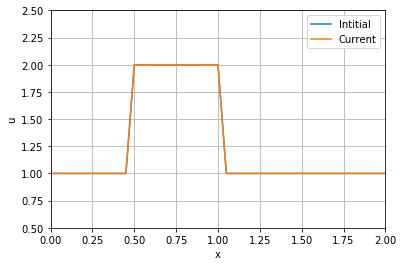

In [20]:
plot_solution( 0, u_hist, x )

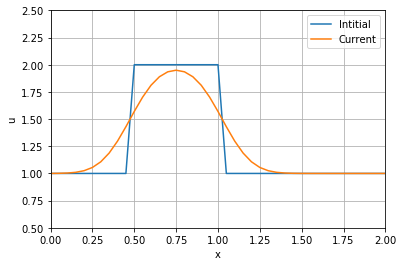

In [21]:
plot_solution( -1, u_hist, x )

In [22]:
import ipywidgets

In [23]:
nt_slider = ipywidgets.IntSlider( value = 0, min = 0, max = nt, step = 1, description = 'Time Step' )
w = ipywidgets.interactive( plot_solution, n = nt_slider, u_hist = ipywidgets.fixed( u_hist ), x = ipywidgets.fixed( x ) )

In [24]:
display( w )

interactive(children=(IntSlider(value=0, description='Time Step', max=20), Output()), _dom_classes=('widget-in…